**FORMULA 1 DATA ANALYSIS PROJECT BY RAGHAV KRISHAN GARG**

In Formula 1, statistical analysis plays a significant role in understanding race wins and performance.

Through this project we will try to answer some of the most common statistical questions regarding race wins in F1. We will be dividing our journey into five simple steps for data analysis that are: 

*ASK*: To ask the right questions

*PREPARE*: Prepare the data to be analsysed

*PROCESS*: Process the data

*ANALYSE*: Analyse the data

*SHARE*: Share the findings and suggestions in the desired format for the decision to be made

***

This project provides a comprehensive analysis of Formula 1 race data, focusing on various aspects such as top drivers, constructors, seasonal winners, race statuses, track speeds, and more. It utilizes Pandas for data manipulation, Matplotlib for basic visualization, and Seaborn for more advanced visualizations.

***

For the purpose we are using the Formula 1 Dataset available on Kaggle.(https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020)

<div class="alert alert-block alert-warning">
<b>ASK PHASE</b> 
</div>

In this phase, we will ask the right and relevant questions to find the right answers. This will help us to avoid under-analysis or over-analysis of data. 

1. Which driver has most grand prix wins?
2. Who is the top constructor with most wins?
3. Which driver has the most wins in each season from 1950 to 2022?
4. What is the count of different race statuses (Finished, Disqualified, Accident, Collision, Power loss)?
5. What are the top tracks that hosted the most number of races?
6. What are the percentage of Races Won from Pole Position?
7. What is relationship between starting position and finishing position on the grid?
8. What is the average fastest lap speed over time for each track?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb #python data visualisation library based on matplotlib

%matplotlib inline

<div class="alert alert-block alert-warning">
<b>PREPARE & PROCESS PHASE</b> 
</div>

In [2]:
results = pd.read_csv('F1_data/results.csv')
drivers = pd.read_csv('F1_data/drivers.csv')
races = pd.read_csv('F1_data/races.csv')
constructors = pd.read_csv('F1_data/constructors.csv')
status = pd.read_csv('F1_data/status.csv')
print(drivers.head())
print(results.head())
print(races.head())
print(constructors.head())
print(status.head())

   driverId   driverRef number code  forename     surname         dob  \
0         1    hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
1         2    heidfeld     \N  HEI      Nick    Heidfeld  1977-05-10   
2         3     rosberg      6  ROS      Nico     Rosberg  1985-06-27   
3         4      alonso     14  ALO  Fernando      Alonso  1981-07-29   
4         5  kovalainen     \N  KOV    Heikki  Kovalainen  1981-10-19   

  nationality                                             url  
0     British     http://en.wikipedia.org/wiki/Lewis_Hamilton  
1      German      http://en.wikipedia.org/wiki/Nick_Heidfeld  
2      German       http://en.wikipedia.org/wiki/Nico_Rosberg  
3     Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso  
4     Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen  
   resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2        

In [3]:
df = pd.merge(results, races[['raceId', 'year', 'name', 'round']], on = 'raceId', how = 'left')
df = pd.merge(df, drivers[['driverId', 'driverRef', 'nationality']], on = 'driverId', how = 'left')
df = pd.merge(df, constructors[['constructorId', 'constructorName', 'nationality']], on = 'constructorId', how = 'left')
df = pd.merge(df, status[['statusId','status']], on = 'statusId', how = 'left')

In [4]:
df = df.sort_values(by = ['year', 'round', 'positionOrder'], ascending = [False, True, True])
# df.to_csv('final_merge.csv') #exporting the file

In [5]:
df.reset_index(drop = True, inplace = True)

In [6]:
print(df.shape)

(25840, 26)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25840 entries, 0 to 25839
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25840 non-null  int64  
 1   raceId           25840 non-null  int64  
 2   driverId         25840 non-null  int64  
 3   constructorId    25840 non-null  int64  
 4   number           25840 non-null  object 
 5   grid             25840 non-null  int64  
 6   position         25840 non-null  object 
 7   positionText     25840 non-null  object 
 8   positionOrder    25840 non-null  int64  
 9   points           25840 non-null  float64
 10  laps             25840 non-null  int64  
 11  time             25840 non-null  object 
 12  milliseconds     25840 non-null  object 
 13  fastestLap       25840 non-null  object 
 14  rank             25840 non-null  object 
 15  fastestLapTime   25840 non-null  object 
 16  fastestLapSpeed  25840 non-null  object 
 17  statusId    

In [8]:
df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLapSpeed,statusId,year,name,round,driverRef,nationality_x,constructorName,nationality_y,status
0,25406,1074,844,6,16,1,1,1,1,26.0,...,206.018,1,2022,Bahrain Grand Prix,1,leclerc,Monegasque,Ferrari,Italian,Finished
1,25407,1074,832,6,55,3,2,2,2,18.0,...,203.501,1,2022,Bahrain Grand Prix,1,sainz,Spanish,Ferrari,Italian,Finished
2,25408,1074,1,131,44,5,3,3,3,15.0,...,202.469,1,2022,Bahrain Grand Prix,1,hamilton,British,Mercedes,German,Finished
3,25409,1074,847,131,63,9,4,4,4,12.0,...,202.313,1,2022,Bahrain Grand Prix,1,russell,British,Mercedes,German,Finished
4,25410,1074,825,210,20,7,5,5,5,10.0,...,201.641,1,2022,Bahrain Grand Prix,1,kevin_magnussen,Danish,Haas F1 Team,American,Finished


In [9]:
sb.set_palette('Set3')
plt.rcParams['figure.figsize'] = 10, 6

<div class="alert alert-block alert-warning">
<b>ANALYSE PHASE</b> 
</div>

***
1. Which driver has most grand prix wins?

           A bar plot is created using Seaborn and Matplotlib to display the top drivers with the most Grand Prix wins. The data is grouped, counted, sorted, and plotted.
***

In [10]:
driverWinner = df.loc[df['positionOrder'] == 1].groupby('driverRef')['positionOrder'].count().sort_values(ascending = False).to_frame().reset_index()
driverWinner.head()

,driverRef,positionOrder
0,hamilton,103
1,michael_schumacher,91
2,vettel,53
3,prost,51
4,senna,41


,driverRef,positionOrder
0,hamilton,103
1,michael_schumacher,91
2,vettel,53
3,prost,51
4,senna,41
5,max_verstappen,35
6,alonso,32
7,mansell,31
8,stewart,27
9,clark,25


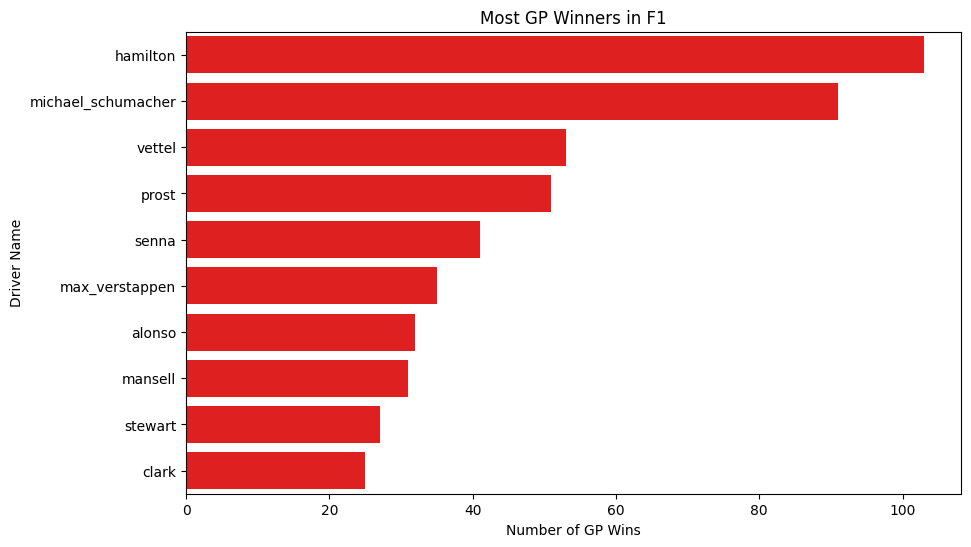

In [11]:
sb.barplot(data = driverWinner.head(10), y = 'driverRef', x = 'positionOrder', color = 'red')
plt.title('Most GP Winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP Wins')
driverWinner.head(10)

***
2. Who is the top constructor with most wins?

        Similar to the driver's plot, a bar plot displays the top constructors with the most Grand Prix wins.
***

In [12]:
consWinner = df.loc[df['positionOrder'] == 1].groupby('constructorName')['positionOrder'].count().sort_values(ascending = False).to_frame().reset_index()
consWinner.head()

,constructorName,positionOrder
0,Ferrari,243
1,McLaren,179
2,Mercedes,125
3,Williams,114
4,Red Bull,92


,constructorName,positionOrder
0,Ferrari,243
1,McLaren,179
2,Mercedes,125
3,Williams,114
4,Red Bull,92
5,Team Lotus,45
6,Renault,35
7,Benetton,27
8,Brabham,23
9,Tyrrell,23


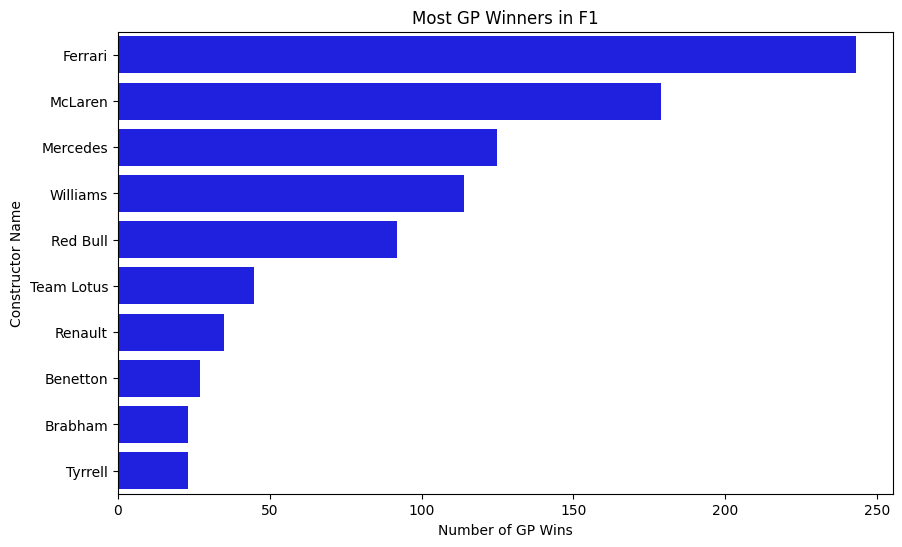

In [13]:
sb.barplot(data = consWinner.head(10), y = 'constructorName', x = 'positionOrder', color = 'blue')
plt.title('Most GP Winners in F1')
plt.ylabel('Constructor Name')
plt.xlabel('Number of GP Wins')
consWinner.head(10)

***
3. Which driver has the most wins in each season from 1950 to 2022?

        The code calculates and prints the driver with the most wins in each season from 1950 to 2022.
***            

In [14]:
driverSeasonWins = []
   
for i in range(1950,2023):
    df_year = df[df['year'] == i]
    seasonDriverWinner = df_year.loc[df['positionOrder'] == 1].groupby('driverRef')['positionOrder'].count().sort_values(ascending = False).to_frame().reset_index()
    driverSeasonWins.append((i,seasonDriverWinner.head(1).values.tolist()[0][0],seasonDriverWinner.head(1).values.tolist()[0][1]))

for j in driverSeasonWins:
    print(j)
    

(1950, 'fangio', 3)
(1951, 'fangio', 3)
(1952, 'ascari', 6)
(1953, 'ascari', 5)
(1954, 'fangio', 6)
(1955, 'fangio', 4)
(1956, 'fangio', 3)
(1957, 'fangio', 4)
(1958, 'moss', 4)
(1959, 'brooks', 2)
(1960, 'jack_brabham', 5)
(1961, 'moss', 2)
(1962, 'hill', 4)
(1963, 'clark', 7)
(1964, 'clark', 3)
(1965, 'clark', 6)
(1966, 'jack_brabham', 4)
(1967, 'clark', 4)
(1968, 'hill', 3)
(1969, 'stewart', 6)
(1970, 'rindt', 5)
(1971, 'stewart', 6)
(1972, 'emerson_fittipaldi', 5)
(1973, 'stewart', 5)
(1974, 'emerson_fittipaldi', 3)
(1975, 'lauda', 5)
(1976, 'hunt', 6)
(1977, 'mario_andretti', 4)
(1978, 'mario_andretti', 6)
(1979, 'jones', 4)
(1980, 'jones', 5)
(1981, 'piquet', 3)
(1982, 'arnoux', 2)
(1983, 'prost', 4)
(1984, 'prost', 7)
(1985, 'prost', 5)
(1986, 'mansell', 5)
(1987, 'mansell', 6)
(1988, 'senna', 8)
(1989, 'senna', 6)
(1990, 'senna', 6)
(1991, 'senna', 7)
(1992, 'mansell', 9)
(1993, 'prost', 7)
(1994, 'michael_schumacher', 8)
(1995, 'michael_schumacher', 9)
(1996, 'damon_hill', 8)


***
4. What is the count of different race statuses (Finished, Disqualified, Accident, Collision, Power loss)?

          The code calculates and prints the count of different race statuses (Finished, Disqualified, Accident, Collision, Power loss) and displays a list of tuples containing the counts and corresponding status names.             
***                

In [15]:
statusCount = df.groupby('statusId')['status'].count().sort_values(ascending = False).to_frame().reset_index()
statusCombined = []
# 1 = Finished
# 2 = Disqualified
# 3 = Accident
# 4 = Collision
# 75 = Power loss
for k in [1, 2, 3, 4, 75]:
    statusIndividual = statusCount[statusCount['statusId'] == k]
    # print((status['statusId'] == k))
    # print(statusIndividual)
    statusCombined.append((statusIndividual.values.tolist()[0][1],status.loc[status['statusId'] == k].values.tolist()[0][1] ))

print(statusCombined)

[(7083, 'Finished'), (143, 'Disqualified'), (1044, 'Accident'), (833, 'Collision'), (14, 'Power loss')]


***
5. What are the top tracks that hosted the most number of races?
        
        The code calculates and prints the tracks that hosted the most number of races.
***

In [16]:
# tracks which hosted most number of races
topTracks = races.groupby('name')['year'].count().sort_values(ascending = False).to_frame().reset_index()
print(topTracks)
# print(topTracks.head().values.tolist()[:5])
topTracksList = []

for m in topTracks.head().values.tolist()[:5]:
    topTracksList.append(m[0])

print(topTracksList)

                             name  year
0              Italian Grand Prix    74
1              British Grand Prix    74
2               Monaco Grand Prix    69
3              Belgian Grand Prix    68
4               German Grand Prix    64
5               French Grand Prix    62
6              Spanish Grand Prix    53
7             Canadian Grand Prix    52
8            Brazilian Grand Prix    48
9        United States Grand Prix    44
10           Hungarian Grand Prix    38
11          Australian Grand Prix    37
12            Japanese Grand Prix    37
13            Austrian Grand Prix    36
14               Dutch Grand Prix    33
15          San Marino Grand Prix    26
16            European Grand Prix    23
17       South African Grand Prix    23
18             Mexican Grand Prix    20
19           Argentine Grand Prix    20
20           Malaysian Grand Prix    19
21             Bahrain Grand Prix    19
22          Portuguese Grand Prix    18
23             Chinese Grand Prix    16


***
6. What are the percentage of Races Won from Pole Position?

        The code calculates and prints the percentage of races won from the pole position.
***        

In [17]:
# % of Races won from Pole Position

startingPos = df.loc[df['grid'] == 1]['positionOrder'].count()
finalPos = df.loc[(df['grid'] == 1) & (df['positionOrder'] == 1)]['driverId'].count()

print('Pole position : ',startingPos)
print('Races won from pole position : ',finalPos)

print("% of races won from pole position : ", round(((finalPos*100)/startingPos),2))

Pole position :  1090
Races won from pole position :  456
% of races won from pole position :  41.83


***
7. What is relationship between starting position and finishing position on the grid?

        A scatter plot is created to visualize the relationship between starting position and finishing position on the grid.
***

Text(0.5, 0, 'Starting Place')

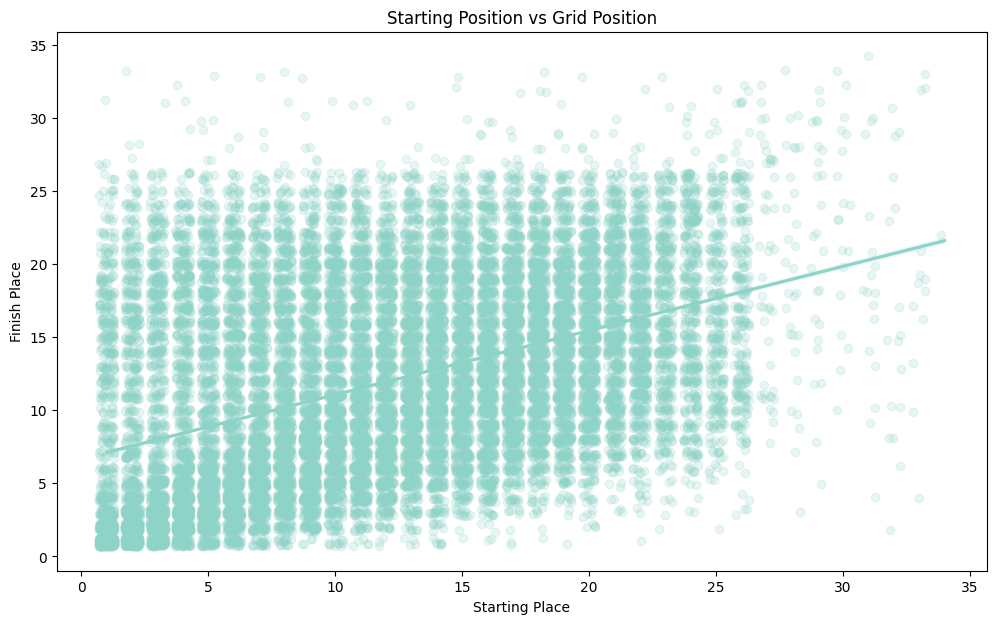

In [18]:
dfNoZero = df[df['grid'] != 0]

plt.figure(figsize = [12,7])
sb.regplot(data = dfNoZero, x = 'grid', y = 'positionOrder', x_jitter = 0.3, y_jitter = 0.3, scatter_kws = {'alpha' : 1/5})
plt.title('Starting Position vs Grid Position')
plt.ylabel('Finish Place')
plt.xlabel('Starting Place')

***
8. What is the average fastest lap speed over time for each track?

         The code calculates the average fastest lap speed for each track and year from 2004 onwards. It then uses Seaborn to create a facet grid of scatter plots to visualize the average speed trend for each track
***

In [19]:
df.fastestLapSpeed.replace('\\N', np.nan, inplace = True)
df.fastestLapSpeed = df.fastestLapSpeed.astype(float)

                           name  year  fastestLapSpeed
0   70th Anniversary Grand Prix  2020       234.248250
1          Abu Dhabi Grand Prix  2009       198.041100
2          Abu Dhabi Grand Prix  2010       193.559045
3          Abu Dhabi Grand Prix  2011       189.779522
4          Abu Dhabi Grand Prix  2012       187.682739
5          Abu Dhabi Grand Prix  2013       189.595286
6          Abu Dhabi Grand Prix  2014       187.267400
7          Abu Dhabi Grand Prix  2015       187.770789
8          Abu Dhabi Grand Prix  2016       188.597273
9          Abu Dhabi Grand Prix  2017       194.579650
10         Abu Dhabi Grand Prix  2018       194.262368
11         Abu Dhabi Grand Prix  2019       195.705200
12         Abu Dhabi Grand Prix  2020       196.079000
13         Abu Dhabi Grand Prix  2021       215.871105
14         Abu Dhabi Grand Prix  2022       211.681050
15        Australian Grand Prix  2004       219.963900
16        Australian Grand Prix  2005       218.430250
17        

C:\Users\dell\anaconda3\envs\datascience\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Average speed amongst all teams during the fasted lap at the individual GPs : ')

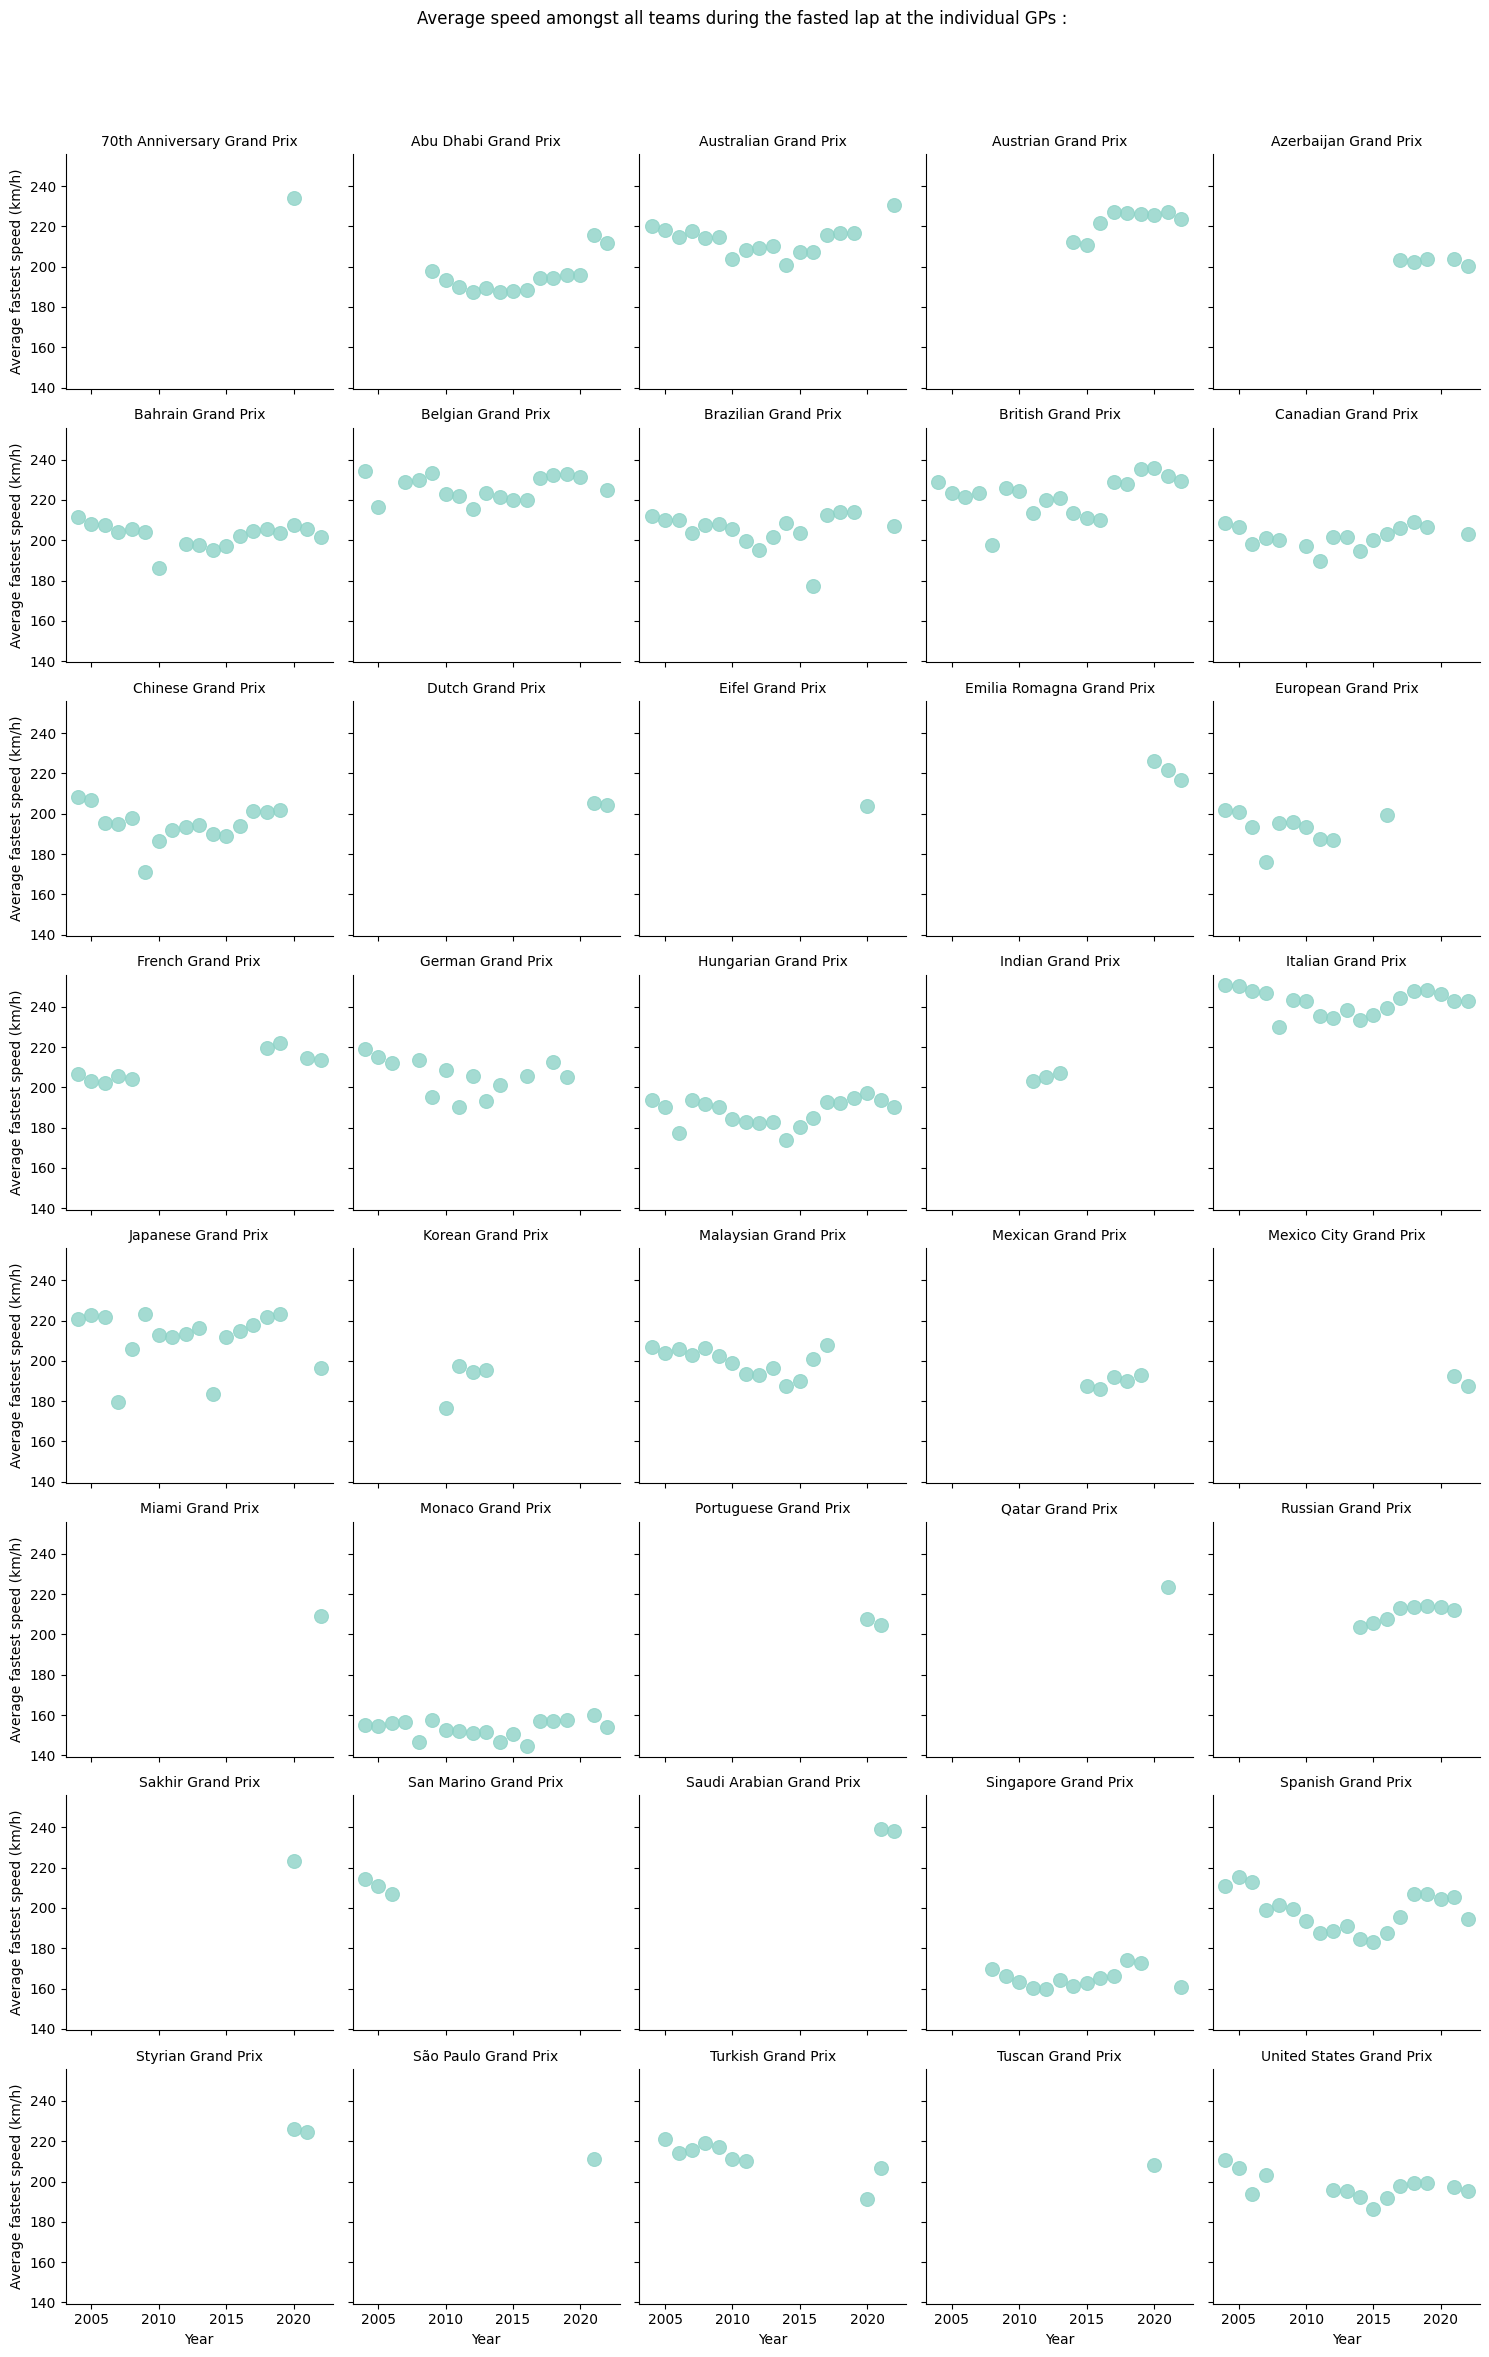

In [20]:
dfSpeed = df[df['year'] >= 2004] #since time data is avialable after 2004

dfSpeedGroup = dfSpeed.groupby(['name', 'year'])['fastestLapSpeed'].mean().to_frame().reset_index()
print(dfSpeedGroup.head(20))
print('All time average speed of tracks : ', dfSpeed.groupby(['name'])['fastestLapSpeed'].mean().to_frame().reset_index())

g = sb.FacetGrid(data = dfSpeedGroup, col = 'name', col_wrap = 5)
g.map(plt.scatter, 'year', 'fastestLapSpeed', alpha = 0.8, linewidth = 0.8, s = 100)
g.set_titles('{col_name}')
g.set_xlabels('Year')
g.set_ylabels('Average fastest speed (km/h)')
plt.subplots_adjust(top = 0.92)
g.fig.suptitle('Average speed amongst all teams during the fasted lap at the individual GPs : ')